In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/sonar.csv


In [2]:
# load the required libraries and packages
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn import metrics
from keras.models import Sequential
from keras.layers import Dense,Dropout
import matplotlib.pyplot as plt
import seaborn as sns

Using TensorFlow backend.


In [3]:
#read the data 
data = pd.read_csv('/kaggle/input/sonar.csv',header=None)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
0     208 non-null float64
1     208 non-null float64
2     208 non-null float64
3     208 non-null float64
4     208 non-null float64
5     208 non-null float64
6     208 non-null float64
7     208 non-null float64
8     208 non-null float64
9     208 non-null float64
10    208 non-null float64
11    208 non-null float64
12    208 non-null float64
13    208 non-null float64
14    208 non-null float64
15    208 non-null float64
16    208 non-null float64
17    208 non-null float64
18    208 non-null float64
19    208 non-null float64
20    208 non-null float64
21    208 non-null float64
22    208 non-null float64
23    208 non-null float64
24    208 non-null float64
25    208 non-null float64
26    208 non-null float64
27    208 non-null float64
28    208 non-null float64
29    208 non-null float64
30    208 non-null float64
31    208 non-null float64
32    208 non-null float64
33  

In [4]:
#seems there is no null values and all the values are contionous variables only
#sns.pairplot(data)
X = data.iloc[:, 0:60].values
y = data.iloc[:, 60].values

In [5]:
#scaling the data
mmx  = MinMaxScaler()
scaled_x =pd.DataFrame( mmx.fit_transform(data.iloc[:, 0:60].values))
scaled_x

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,0.136431,0.156451,0.135677,0.035426,0.224956,0.237571,0.407468,0.340904,0.449282,0.285714,...,0.231076,0.027104,0.155844,0.435673,0.149660,0.417949,0.502841,0.185355,0.245179,0.060046
1,0.323009,0.221603,0.272011,0.150024,0.283033,0.666756,0.574405,0.755458,0.483045,0.394537,...,0.124502,0.108417,0.218182,0.111111,0.199546,0.479487,0.389205,0.105263,0.140496,0.087760
2,0.182153,0.246892,0.356110,0.243699,0.230028,0.585327,0.648810,0.819405,0.817859,0.869584,...,0.032869,0.319544,0.418182,0.248538,0.394558,0.615385,0.889205,0.368421,0.258953,0.166282
3,0.062684,0.070724,0.199737,0.034950,0.034999,0.071486,0.288149,0.269239,0.077447,0.164593,...,0.240040,0.161198,0.080519,0.409357,0.179138,0.176923,0.133523,0.093822,0.107438,0.256351
4,0.550885,0.282898,0.153088,0.079886,0.132640,0.147003,0.318182,0.531863,0.516659,0.621479,...,0.155378,0.032810,0.127273,0.277778,0.235828,0.028205,0.196023,0.102975,0.292011,0.203233
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.126844,0.145735,0.050263,0.028293,0.082678,0.410642,0.539773,0.361411,0.333629,0.367653,...,0.202191,0.154066,0.241558,0.552632,0.061224,0.248718,0.176136,0.256293,0.528926,0.348730
204,0.227139,0.040720,0.092970,0.120304,0.175755,0.230046,0.258929,0.212348,0.141419,0.291863,...,0.050797,0.075606,0.228571,0.365497,0.129252,0.151282,0.088068,0.066362,0.168044,0.140878
205,0.373894,0.184741,0.054205,0.055635,0.072026,0.287288,0.331169,0.247630,0.175181,0.345488,...,0.154382,0.216833,0.062338,0.119883,0.126984,0.217949,0.389205,0.308924,0.209366,0.057737
206,0.212389,0.148736,0.156045,0.130766,0.025361,0.336469,0.387446,0.235502,0.276914,0.320463,...,0.041833,0.111270,0.106494,0.339181,0.068027,0.079487,0.088068,0.173913,0.096419,0.096998


In [6]:
#converting labels into 0 & 1's
le = LabelEncoder()
Y = le.fit_transform(y)


In [7]:
#train ,test split
xtrain,xtest,ytrain,ytest = train_test_split(scaled_x,Y,test_size =.2,random_state = 0)

In [25]:
#building a ann model
classifier = Sequential()

# Build the input and hidden layers with dropout
classifier.add(Dense(units = 32, activation = 'relu', kernel_initializer = 'he_uniform', input_dim = 60))
classifier.add(Dropout(rate = 0.1))

# Adding the second hidden layer
classifier.add(Dense(units = 32, activation = 'relu', kernel_initializer = 'he_uniform'))
classifier.add(Dropout(rate = 0.1))

# Adding the third hidden layer
classifier.add(Dense(units = 32, activation = 'relu', kernel_initializer = 'he_uniform'))
classifier.add(Dropout(rate = 0.1))

# Adding an output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting ANN to training set
history = classifier.fit(xtrain, ytrain, validation_split = 0.33, batch_size = 10, epochs = 30)

Train on 111 samples, validate on 55 samples
Epoch 1/30
111/111 [==============================] - 0s 3ms/step - loss: 0.6940 - accuracy: 0.4595 - val_loss: 0.6810 - val_accuracy: 0.5818
Epoch 2/30
111/111 [==============================] - 0s 463us/step - loss: 0.6862 - accuracy: 0.5135 - val_loss: 0.6699 - val_accuracy: 0.5636
Epoch 3/30
111/111 [==============================] - 0s 454us/step - loss: 0.6735 - accuracy: 0.5405 - val_loss: 0.6581 - val_accuracy: 0.5636
Epoch 4/30
111/111 [==============================] - 0s 446us/step - loss: 0.6721 - accuracy: 0.5315 - val_loss: 0.6491 - val_accuracy: 0.5636
Epoch 5/30
111/111 [==============================] - 0s 471us/step - loss: 0.6657 - accuracy: 0.5315 - val_loss: 0.6437 - val_accuracy: 0.5636
Epoch 6/30
111/111 [==============================] - 0s 445us/step - loss: 0.6538 - accuracy: 0.5495 - val_loss: 0.6336 - val_accuracy: 0.6364
Epoch 7/30
111/111 [==============================] - 0s 429us/step - loss: 0.6573 - accuracy

In [9]:
classifier.summary

<bound method Network.summary of <keras.engine.sequential.Sequential object at 0x7f7320cf15c0>>

In [15]:
#ypred = classifier.predict(xtest)>0.5

# Evaluating using confusion matrix
#from sklearn.metrics import confusion_matrix
#cm = confusion_matrix(ytest, ypred)

# Listing all the data in training history
print(history.history.keys())

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


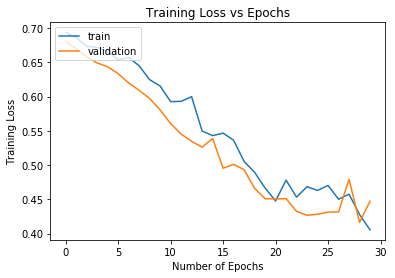

In [26]:
# Visualizing the loss updates with the number of epochs
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training Loss vs Epochs')
plt.ylabel('Training Loss')
plt.xlabel('Number of Epochs')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

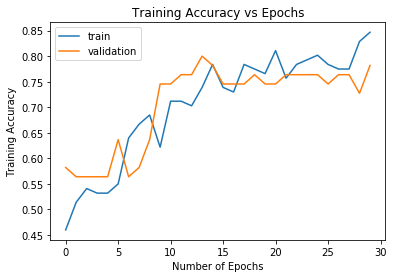

In [27]:
# Visualizing the accuracy updates with the number of epochs
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training Accuracy vs Epochs')
plt.ylabel('Training Accuracy')
plt.xlabel('Number of Epochs')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [33]:
# Evaluating the ANN
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from keras.models import Sequential
from keras.layers import Dense
def build_classifier():
    classifier = Sequential()
    classifier.add(Dense(units = 64, kernel_initializer = 'he_uniform', activation = 'relu', input_dim = 60))
    classifier.add(Dropout(rate = 0.1))
    classifier.add(Dense(units = 64, kernel_initializer = 'he_uniform', activation = 'relu'))
    classifier.add(Dropout(rate = 0.1))
    classifier.add(Dense(units = 64, kernel_initializer = 'he_uniform', activation = 'relu'))
    classifier.add(Dropout(rate = 0.1))
    classifier.add(Dense(units = 1, kernel_initializer = 'he_uniform', activation = 'sigmoid'))
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier
classifier = KerasClassifier(build_fn = build_classifier, batch_size = 10, epochs = 30)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
accuracies = cross_val_score(estimator = classifier, X = scaled_x, y = Y, cv = kfold)
print(accuracies)
mean = accuracies.mean()
print(mean)
#variance = accuracies.std()
#print(variance)

Epoch 1/30
187/187 [==============================] - 0s 2ms/step - loss: 0.6861 - accuracy: 0.5722
Epoch 2/30
187/187 [==============================] - 0s 379us/step - loss: 0.6212 - accuracy: 0.6738
Epoch 3/30
187/187 [==============================] - 0s 367us/step - loss: 0.5787 - accuracy: 0.7059
Epoch 4/30
187/187 [==============================] - 0s 371us/step - loss: 0.5252 - accuracy: 0.7433
Epoch 5/30
187/187 [==============================] - 0s 376us/step - loss: 0.5096 - accuracy: 0.7433
Epoch 6/30
187/187 [==============================] - 0s 390us/step - loss: 0.4457 - accuracy: 0.8021
Epoch 7/30
187/187 [==============================] - 0s 562us/step - loss: 0.4655 - accuracy: 0.7807
Epoch 8/30
187/187 [==============================] - 0s 448us/step - loss: 0.3946 - accuracy: 0.8503
Epoch 9/30
187/187 [==============================] - 0s 380us/step - loss: 0.4475 - accuracy: 0.8021
Epoch 10/30
187/187 [==============================] - 0s 372us/step - loss: 0.3381 

187/187 [==============================] - 0s 380us/step - loss: 0.2138 - accuracy: 0.9465
Epoch 20/30
187/187 [==============================] - 0s 372us/step - loss: 0.2200 - accuracy: 0.9198
Epoch 21/30
187/187 [==============================] - 0s 443us/step - loss: 0.1861 - accuracy: 0.9519
Epoch 22/30
187/187 [==============================] - 0s 405us/step - loss: 0.1912 - accuracy: 0.9037
Epoch 23/30
187/187 [==============================] - 0s 457us/step - loss: 0.1551 - accuracy: 0.9519
Epoch 24/30
187/187 [==============================] - 0s 436us/step - loss: 0.1278 - accuracy: 0.9626
Epoch 25/30
187/187 [==============================] - 0s 456us/step - loss: 0.1603 - accuracy: 0.9251
Epoch 26/30
187/187 [==============================] - 0s 412us/step - loss: 0.1383 - accuracy: 0.9626
Epoch 27/30
187/187 [==============================] - 0s 393us/step - loss: 0.1082 - accuracy: 0.9626
Epoch 28/30
187/187 [==============================] - 0s 395us/step - loss: 0.1126 -

187/187 [==============================] - 0s 376us/step - loss: 0.4925 - accuracy: 0.7914
Epoch 8/30
187/187 [==============================] - 0s 445us/step - loss: 0.4838 - accuracy: 0.7540
Epoch 9/30
187/187 [==============================] - 0s 439us/step - loss: 0.4225 - accuracy: 0.8021
Epoch 10/30
187/187 [==============================] - 0s 439us/step - loss: 0.3889 - accuracy: 0.8396
Epoch 11/30
187/187 [==============================] - 0s 378us/step - loss: 0.3972 - accuracy: 0.8182
Epoch 12/30
187/187 [==============================] - 0s 374us/step - loss: 0.3822 - accuracy: 0.8128
Epoch 13/30
187/187 [==============================] - 0s 422us/step - loss: 0.3753 - accuracy: 0.8503
Epoch 14/30
187/187 [==============================] - 0s 384us/step - loss: 0.3335 - accuracy: 0.8663
Epoch 15/30
187/187 [==============================] - 0s 385us/step - loss: 0.2825 - accuracy: 0.9091
Epoch 16/30
187/187 [==============================] - 0s 381us/step - loss: 0.3286 - a

187/187 [==============================] - 0s 420us/step - loss: 0.0987 - accuracy: 0.9840
Epoch 26/30
187/187 [==============================] - 0s 406us/step - loss: 0.1286 - accuracy: 0.9679
Epoch 27/30
187/187 [==============================] - 0s 414us/step - loss: 0.0973 - accuracy: 0.9733
Epoch 28/30
187/187 [==============================] - 0s 404us/step - loss: 0.0897 - accuracy: 0.9733
Epoch 29/30
187/187 [==============================] - 0s 428us/step - loss: 0.0846 - accuracy: 0.9679
Epoch 30/30
21/21 [==============================] - 0s 3ms/step
Epoch 1/30
188/188 [==============================] - 0s 2ms/step - loss: 0.7060 - accuracy: 0.5372
Epoch 2/30
188/188 [==============================] - 0s 441us/step - loss: 0.6492 - accuracy: 0.5904
Epoch 3/30
188/188 [==============================] - 0s 500us/step - loss: 0.6010 - accuracy: 0.6755
Epoch 4/30
188/188 [==============================] - 0s 489us/step - loss: 0.5400 - accuracy: 0.7234
Epoch 5/30
188/188 [======

In [37]:
# Tuning the ANN
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
def build_classifier():
    classifier = Sequential()
    classifier.add(Dense(units = 64, kernel_initializer = 'he_uniform', activation = 'relu', input_dim = 60))
    classifier.add(Dropout(rate = 0.1))
    classifier.add(Dense(units = 64, kernel_initializer = 'he_uniform', activation = 'relu'))
    classifier.add(Dropout(rate = 0.1))
    classifier.add(Dense(units = 64, kernel_initializer = 'he_uniform', activation = 'relu'))
    classifier.add(Dropout(rate = 0.1))
    classifier.add(Dense(units = 1, kernel_initializer = 'he_uniform', activation = 'sigmoid'))
    classifier.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier
classifier = KerasClassifier(build_fn = build_classifier)
parameters = {'batch_size': [10, 25, 32],
              'epochs': [30, 40,100]}
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10)
grid_search = grid_search.fit(scaled_x, Y)    
best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_

ValueError: optimizers is not a legal parameter

In [35]:
best_accuracy

0.6169047619047618